INFORMATION RETRIEVAL

ASSIGNMENT-8

PRANSHU PARATE

202211063

Spam classification dataset

In [ ]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
col_names = ['category','message']
spam_data = pd.read_csv("/content/SMSSpamCollection - SMSSpamCollection.csv",header=None, names=col_names)
spam_data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Preprocessing

In [ ]:
def remove_ellipsis(message):
    message = message.replace('..', '.')
    return message.replace("...", "")

spam_data['message'] = spam_data['message'].apply(remove_ellipsis)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(message):
    # Lowercasing
    message = message.lower()

    # Tokenization
    words = nltk.word_tokenize(message)


    words = [word for word in words if word.isalpha()]

    # Stopword Removal
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    preprocessed_text = " ".join(lemmatized_words)

    return preprocessed_text


spam_data['message'] = spam_data['message'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(spam_data['message'])
Y = spam_data['category']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


Kmeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


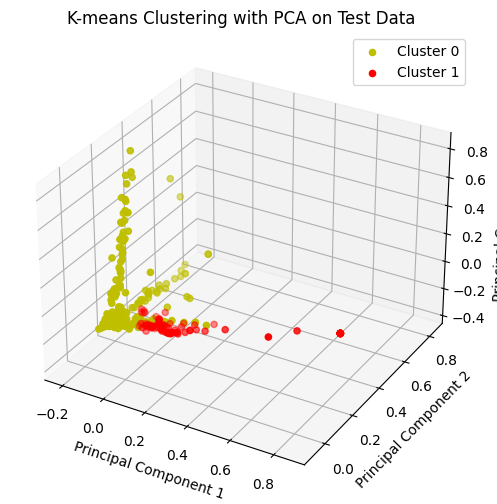

In [ ]:
k = 2
kmeans = KMeans(n_clusters= k, random_state=42)
kmeans.fit(Xtrain)


pca = PCA(n_components=3)
reduce_test_data = pca.fit_transform(Xtest.toarray())


test_cluster_label = kmeans.predict(Xtest)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')


colors = ['y', 'r']

for cluster in range(k):
    cluster_sample = reduce_test_data[test_cluster_label == cluster]
    ax.scatter(cluster_sample[:, 0], cluster_sample[:, 1], cluster_sample[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

ax.set_title('K-means Clustering with PCA on Test Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


Agglomerative Clustering

In [ ]:
thresholds = [1.0, 1.5, 2.0, 2.5]

for i in thresholds:
    cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=i)
    cluster_label = cluster.fit_predict(Xtrain.toarray())


    no_cluster = len(set(cluster_label)) - (1 if -1 in cluster_label else 0)

    print(f'Number of clusters for threshold {i}: {no_cluster}')


Number of clusters for threshold 1.0: 3575
Number of clusters for threshold 1.5: 1082
Number of clusters for threshold 2.0: 369
Number of clusters for threshold 2.5: 134


In [ ]:
Model = AgglomerativeClustering()
train_cluster = Model.fit_predict(Xtrain.toarray())
test_cluster = Model.fit_predict(Xtest.toarray())

In [ ]:
num_cluster = Model.n_clusters_
print(f"No. of clusters: {num_cluster}")

No. of clusters: 2


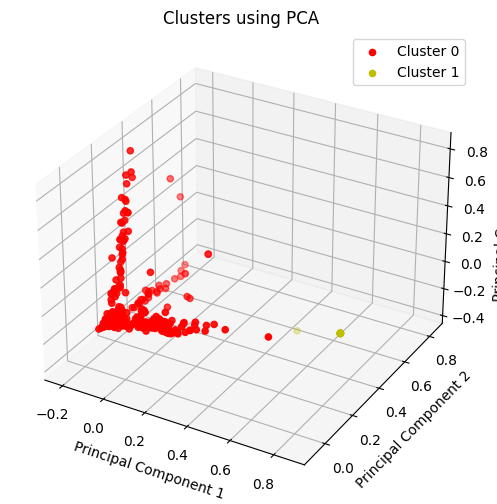

In [ ]:
pca = PCA(n_components=3)
reduce_test_data = pca.fit_transform(Xtest.toarray())


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'y']

for cluster in range(num_cluster):
    cluster_sample = reduce_test_data[test_cluster == cluster]
    ax.scatter(cluster_sample[:, 0], cluster_sample[:, 1], cluster_sample[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

ax.set_title('Clusters using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

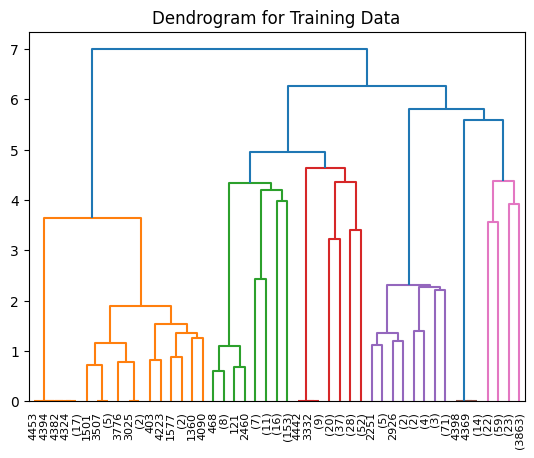

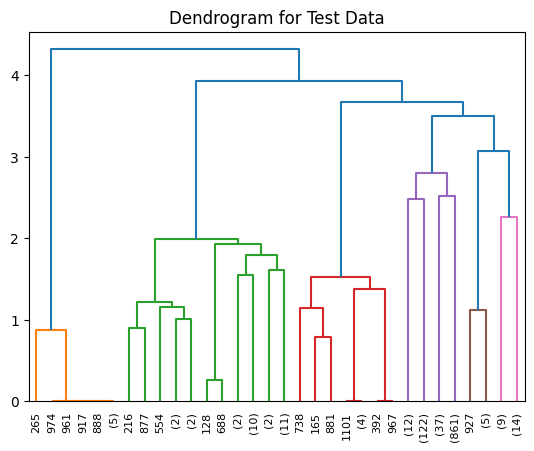

In [ ]:
link_matrix_train = linkage(Xtrain.toarray(), method='ward')
dendrogram(link_matrix_train, p=5, truncate_mode='level', leaf_rotation=90.)
plt.title("Dendrogram for Training Data")
plt.show()

# Create a dendrogram for test data
link_matrix_test = linkage(Xtest.toarray(), method='ward')
dendrogram(link_matrix_test, p=5, truncate_mode='level', leaf_rotation=90.)
plt.title("Dendrogram for Test Data")
plt.show()

News group dataset

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram

porter = nltk.PorterStemmer() #"distribute", "distributing", "distributor" or "distribution".
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data Preprocessing

In [2]:
# Preprocess the messages
def clean_text(string):
    message = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', string)
    message = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', #Replace URLs with 'httpaddr'
                     message)
    message = re.sub(r'£|\$', 'money', message) #Replace money symbols with 'moneysymb'
    message = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'phonenumbr'
        'phonenumbr', message)
    message = re.sub(r'\d+(\.\d+)?', 'numbr', message)  #Replace numbers with 'numbr'
    message = re.sub(r'[^\w\d\s]', ' ', message)
    message = re.sub(r'\s+', ' ', message)
    message = re.sub(r'^\s+|\s+?$', '', message.lower())
    return ' '.join(
    porter.stem(term)
    for term in message.split()
    if term not in set(stop_words)
    )

In [3]:
from sklearn.datasets import fetch_20newsgroups

# Categories you want to load from the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Load the train set
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Load the test set
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Preprocess data
newsgroups_train['data'] = [clean_text(text) for text in newsgroups_train['data']]

# Access the data and target attributes
X_train_newsgroups = newsgroups_train.data
y_train_newsgroups = newsgroups_train.target

X_test_newsgroups = newsgroups_test.data
y_test_newsgroups = newsgroups_test.target

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the training data and transform the training messages
X_train_newsgroups = vectorizer.fit_transform(X_train_newsgroups)

# Transform the test messages
X_test_newsgroups = vectorizer.transform(X_test_newsgroups)

Kmeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-95237e0f9198>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster_samples[:, 0], cluster_samples[:, 1], cluster_samples[:, 2], cmap='viridis', label=f'Cluster {cluster}')


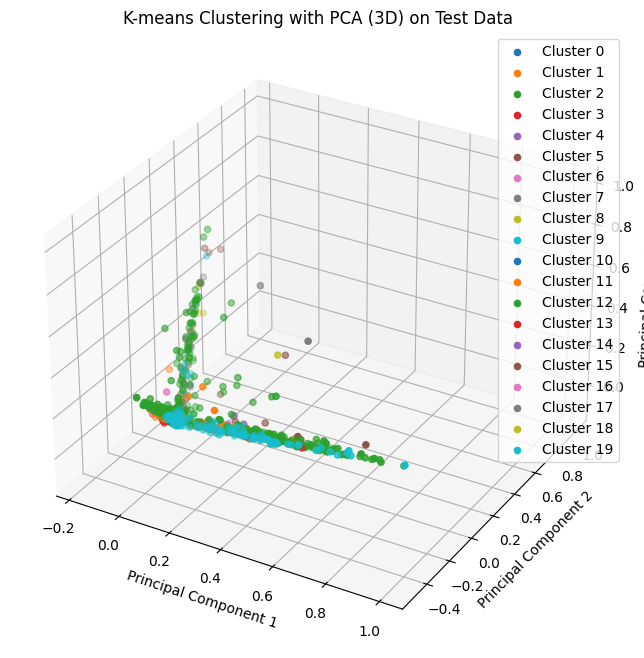

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize K-means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=20, random_state=42)

# Fit K-means to the TF-IDF transformed training data
kmeans.fit(X_train_newsgroups)

# Get cluster assignments for training data
kmeans_labels = kmeans.labels_

# Plot the clusters in 2D using PCA (similar to the previous example)
from sklearn.decomposition import PCA
# Reduce Dimensions with PCA
pca = PCA(n_components=3)  # Reduce to 2 dimensions
x_train_pca = pca.fit_transform(X_train_newsgroups.toarray())

# # Predict the cluster labels for the test data (X_test)
test_labels = kmeans.predict(X_test_newsgroups)

X_test_pca = pca.fit_transform(X_test_newsgroups.toarray())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.Spectral(test_labels.astype(float) / 20)

for cluster in range(20):
    cluster_samples = X_test_pca[test_labels == cluster]
    ax.scatter(cluster_samples[:, 0], cluster_samples[:, 1], cluster_samples[:, 2], cmap='viridis', label=f'Cluster {cluster}')

ax.set_title('K-means Clustering with PCA (3D) on Test Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

Agglomerative Clustering

Number of clusters for threshold 1.0: 2068
Number of clusters for threshold 1.5: 472
Number of clusters for threshold 2.0: 78
Number of clusters for threshold 2.5: 24


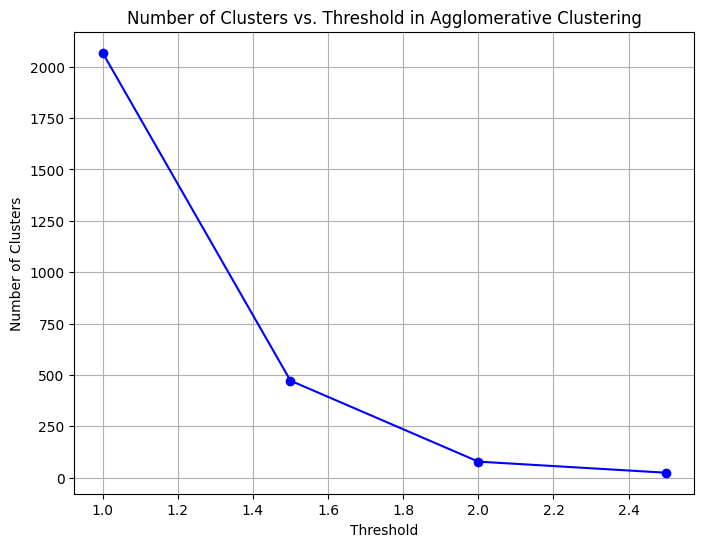

In [5]:
# Define a range of thresholds to explore
thresholds = np.arange(1.0, 3.0, 0.5)

# Initialize lists to store the number of clusters for each threshold
num_clusters_per_threshold = []

# Iterate through different thresholds
for threshold in thresholds:
    # Step 1: Perform Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    agg_clustering.fit(X_train_newsgroups.toarray())

    # Step 2: Get the number of clusters for this threshold
    num_clusters = len(np.unique(agg_clustering.labels_))

    # Append the number of clusters to the list
    num_clusters_per_threshold.append(num_clusters)

    print(f'Number of clusters for threshold {threshold}: {num_clusters}')

# Step 3: Plot the number of clusters per threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_clusters_per_threshold, marker='o', linestyle='-', color='b')
plt.title("Number of Clusters vs. Threshold in Agglomerative Clustering")
plt.xlabel("Threshold")
plt.ylabel("Number of Clusters")
plt.grid(True)
plt.show()

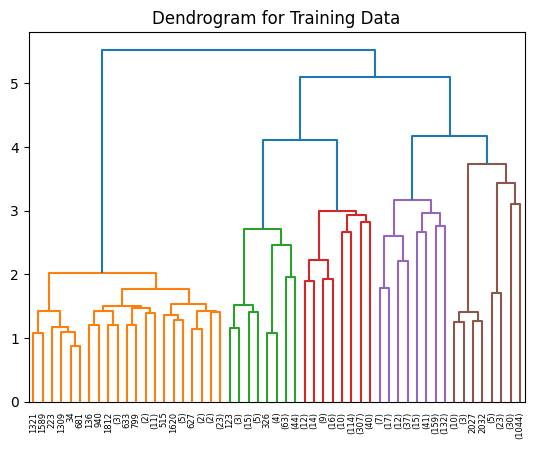

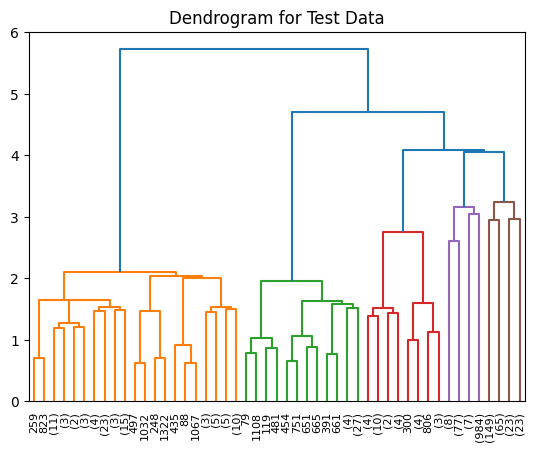

In [6]:
# Perform Agglomerative Clustering on the data
model = AgglomerativeClustering()
train_cluster_labels_news = model.fit_predict(X_train_newsgroups.toarray())
test_cluster_labels_news = model.fit_predict(X_test_newsgroups.toarray())

# Perform Agglomerative Clustering on the data
model = AgglomerativeClustering()
train_cluster_labels = model.fit_predict(X_train_newsgroups.toarray())
test_cluster_labels = model.fit_predict(X_test_newsgroups.toarray())


# Plot the dendrogram
linkage_matrix_train = linkage(X_train_newsgroups.toarray(), method='ward')
dendrogram(linkage_matrix_train, p=5, truncate_mode='level', leaf_rotation=90.)
plt.title("Dendrogram for Training Data")
plt.show()

# Create a dendrogram for test data
linkage_matrix_test = linkage(X_test_newsgroups.toarray(), method='ward')
dendrogram(linkage_matrix_test, p=5, truncate_mode='level', leaf_rotation=90.)
plt.title("Dendrogram for Test Data")
plt.show()